In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Accuracy (SVM): 0.5630176178286402


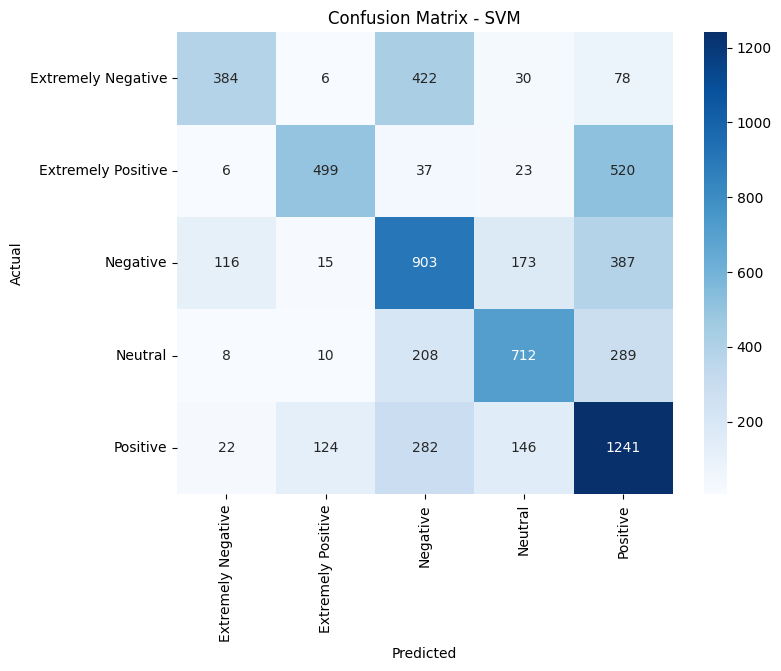

Predicted sentiments (SVM): ['Neutral' 'Positive' 'Extremely Positive' ... 'Positive' 'Positive'
 'Negative']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training and test datasets
train_data = pd.read_csv('/content/Corona_NLP_train.csv', encoding='latin1')
test_data = pd.read_csv('/content/Corona_NLP_test.csv', encoding='latin1')

# Drop unnecessary columns
train_data = train_data[['OriginalTweet', 'Sentiment']]
test_data = test_data[['OriginalTweet', 'Sentiment']]

# Handle missing values
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data['OriginalTweet'], train_data['Sentiment'], test_size=0.2, random_state=42)

# Handle missing values in the test dataset (if any)
imputer = SimpleImputer(strategy='most_frequent')
y_train = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Convert text to vectors
X_train_vectors = vectorizer.fit_transform(X_train)
X_val_vectors = vectorizer.transform(X_val)
X_test_vectors = vectorizer.transform(test_data['OriginalTweet'])

# Implement Support Vector Machine (SVM) classifier
svm = SVC()
svm.fit(X_train_vectors, y_train)

# Predict using SVM
y_pred_svm = svm.predict(X_val_vectors)

# Calculate accuracy for SVM
accuracy_svm = accuracy_score(y_val, y_pred_svm)
print("Accuracy (SVM):", accuracy_svm)

# Confusion matrix for SVM
cm_svm = confusion_matrix(y_val, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

# Predict using the test dataset
y_pred_test_svm = svm.predict(X_test_vectors)

# Print the predicted sentiments for the test dataset
print("Predicted sentiments (SVM):", y_pred_test_svm)
